# Mobile App Analysis

### Data Abstract
This analysis examines data from the Google Play Store apps to gain insights into user preferences, app ratings, and download trends. By analyzing this data, valuable information can be obtained regarding app performance, user satisfaction, and market trends. This analysis can be useful for app developers, marketers, and stakeholders in making informed decisions on app development, marketing strategies, and identifying potential areas for improvement to enhance user experience and maximize app success.

Situation: 
Jose is a owner of a app development firm, he is required to launch an app. Find a best insights from the data so that he is able to launch the app in the best space to generate maximum profits.

In [1]:
#Importing requirements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading dataset
df_ = pd.read_csv("googleplaystore.csv")
#Displaying all columns
pd.set_option('display.max_columns', None)
#Dataframe
df_.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [3]:
#Dataframe summarised
print("Summary:", df_.describe(include="all"))
print("Dtypes:", df_.info())
print("Shape:", df_.shape)

Summary:            App Category       Rating Reviews                Size    Installs  \
count    10841    10841  9367.000000   10841               10841       10841   
unique    9660       34          NaN    6002                 462          22   
top     ROBLOX   FAMILY          NaN       0  Varies with device  1,000,000+   
freq         9     1972          NaN     596                1695        1579   
mean       NaN      NaN     4.193338     NaN                 NaN         NaN   
std        NaN      NaN     0.537431     NaN                 NaN         NaN   
min        NaN      NaN     1.000000     NaN                 NaN         NaN   
25%        NaN      NaN     4.000000     NaN                 NaN         NaN   
50%        NaN      NaN     4.300000     NaN                 NaN         NaN   
75%        NaN      NaN     4.500000     NaN                 NaN         NaN   
max        NaN      NaN    19.000000     NaN                 NaN         NaN   

         Type  Price Content R

## Data Cleaning

In [4]:
#Missing data
df_.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [5]:
#Duplicates
df_.duplicated().sum()

483

In [6]:
#Removing missing values
df_[df_["Rating"].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82M,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100+,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up


In [7]:
#Checking for category having highest missing values
df_[df_["Rating"].isna()].groupby("Category")["Category"].value_counts().sort_values(ascending=False)

Category             Category           
FAMILY               FAMILY                 225
BUSINESS             BUSINESS               157
MEDICAL              MEDICAL                113
TOOLS                TOOLS                  109
PERSONALIZATION      PERSONALIZATION         78
PRODUCTIVITY         PRODUCTIVITY            73
LIFESTYLE            LIFESTYLE               68
SPORTS               SPORTS                  65
COMMUNICATION        COMMUNICATION           59
BOOKS_AND_REFERENCE  BOOKS_AND_REFERENCE     53
NEWS_AND_MAGAZINES   NEWS_AND_MAGAZINES      50
GAME                 GAME                    47
HEALTH_AND_FITNESS   HEALTH_AND_FITNESS      44
FINANCE              FINANCE                 43
DATING               DATING                  39
SOCIAL               SOCIAL                  36
TRAVEL_AND_LOCAL     TRAVEL_AND_LOCAL        32
SHOPPING             SHOPPING                22
LIBRARIES_AND_DEMO   LIBRARIES_AND_DEMO      20
EVENTS               EVENTS                  19

In [8]:
#Removing Duplicates
df_.drop_duplicates(subset=["App", "Last Updated", "Current Ver"], keep="first", ignore_index=True, inplace=True)

#### Removing data where the installs are less than 10k and no ratings


In [9]:
import re
pattern = r'(\d[\d,.]*)'
df_["Installs"]=df_["Installs"].astype(str).str.findall(pattern).apply(lambda x: float(x[-1].replace(',', '')) if x else None)

In [10]:
filt1 = df_[df_["Rating"].isna()]["Installs"].where(df_["Installs"]>= 10000.0).notnull()

In [11]:
j = df_.where(df_["Installs"] >= 10000.0)["Installs"].isna() # Represents, installs < 10k
l = df_["Rating"].isna() #Represents, rating is NaN

In [12]:
df_ = df_[~((l==True)&(j==True))]

In [13]:
df_.reset_index(drop=True, inplace=True)

In [14]:
df_[df_["Rating"].isna()].groupby("Category")["Category"].value_counts().sort_values(ascending=False)

Category             Category           
LIBRARIES_AND_DEMO   LIBRARIES_AND_DEMO     10
FAMILY               FAMILY                  9
PARENTING            PARENTING               9
BEAUTY               BEAUTY                  6
FOOD_AND_DRINK       FOOD_AND_DRINK          4
NEWS_AND_MAGAZINES   NEWS_AND_MAGAZINES      4
HOUSE_AND_HOME       HOUSE_AND_HOME          3
TOOLS                TOOLS                   3
BOOKS_AND_REFERENCE  BOOKS_AND_REFERENCE     3
PERSONALIZATION      PERSONALIZATION         3
SPORTS               SPORTS                  2
FINANCE              FINANCE                 2
GAME                 GAME                    2
LIFESTYLE            LIFESTYLE               2
MEDICAL              MEDICAL                 2
BUSINESS             BUSINESS                2
SOCIAL               SOCIAL                  1
PRODUCTIVITY         PRODUCTIVITY            1
SHOPPING             SHOPPING                1
TRAVEL_AND_LOCAL     TRAVEL_AND_LOCAL        1
ART_AND_DESIGN     

In [15]:
#Categorywise Ratings mean. 
rating_by_cat_mean = df_.groupby("Category")["Rating"].mean().round(decimals=1)
#General Rating mean
rating_by_cat_mean[1:].mean()

4.184848484848485

In [16]:
df_["Rating"].fillna(4.1, inplace=True)

As we can observe that the mean value of rating is 4.1. Hence, we are replacing the filtered missing values by 4.1 to have a clean data.

In [17]:
df_["Rating"].isna().sum()

0

Data is cleaned based on following parameters: 
- Removing data having no ratings and installs less than 10,000.
- Removing duplicates.
- Substituting the ratings, in filtered missing values by the mean.

### Top 5 Categories in Playstore.

In [18]:
test2 =df_.groupby("Category")["Category"].value_counts().sort_values(ascending=False).head(5)
test2

Category      Category    
FAMILY        FAMILY          1624
GAME          GAME             918
TOOLS         TOOLS            725
FINANCE       FINANCE          305
PRODUCTIVITY  PRODUCTIVITY     304
Name: Category, dtype: int64

In [19]:
xyz = test2.droplevel(1).to_frame()

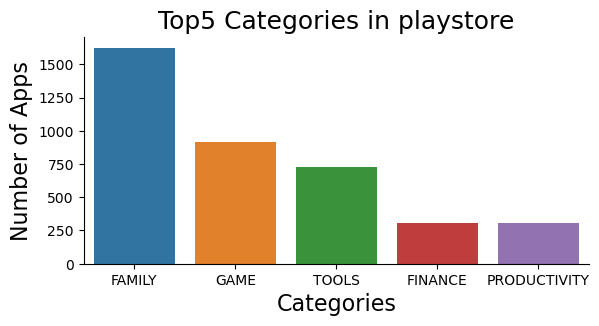

In [20]:
sns.catplot(data=xyz, x=xyz.index.values.tolist(), y=xyz["Category"].values.tolist(), kind="bar", height=3, aspect=2)
plt.xlabel("Categories", size=16)
plt.ylabel("Number of Apps", size=16)
plt.title("Top5 Categories in playstore", size=18)
plt.show()

### Free and Paid Apps

In [21]:
df_["Type"] = df_["Type"].replace("0","Free")

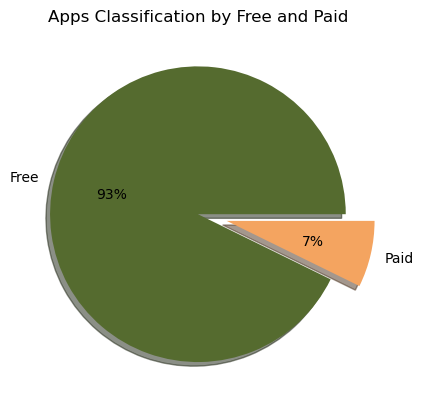

In [22]:
labels=["Free", "Paid"]
colors=["darkolivegreen", "sandybrown"]
explode=[0,0.2]
plt.pie(df_["Type"].value_counts(), labels = labels, colors = colors, autopct='%.0f%%', shadow=True, explode=explode)
plt.title("Apps Classification by Free and Paid")
plt.show()

Free apps forms majority in the google playstore

### Average reviews for Paid Vs Free apps

In [23]:
df_["Reviews"] = df_["Reviews"].str.extract('(\d+)')

In [24]:
df_["Reviews"] = pd.to_numeric(df_["Reviews"])

In [25]:
df_.groupby("Type")["Reviews"].mean().round()

Type
Free    280721.0
Paid     10919.0
Name: Reviews, dtype: float64

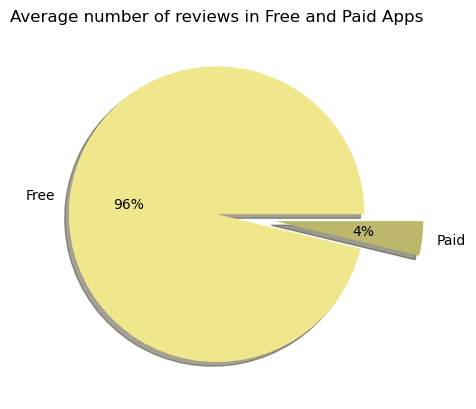

In [26]:
labels=["Free", "Paid"]
colors=["khaki", "darkkhaki"]
explode=[0,0.4]
plt.pie(df_.groupby("Type")["Reviews"].mean().round(), labels = labels, colors = colors, autopct='%.0f%%', shadow=True, explode=explode)
plt.title("Average number of reviews in Free and Paid Apps")
plt.show()

### Top 5 Categories with more installs
It will give the category with potential market.

In [27]:
df_.sort_values(by="Installs", ascending=False)[["Category", "App", "Installs", "Type", "Genres"]].head().value_counts()

Category       App                 Installs      Type  Genres       
COMMUNICATION  WhatsApp Messenger  1.000000e+09  Free  Communication    1
PHOTOGRAPHY    Google Photos       1.000000e+09  Free  Photography      1
PRODUCTIVITY   Google Drive        1.000000e+09  Free  Productivity     1
SOCIAL         Google+             1.000000e+09  Free  Social           1
               Instagram           1.000000e+09  Free  Social           1
dtype: int64

### Genre with most reviews

In [28]:
df_.sort_values(by="Reviews", ascending=False)[["App", "Category", "Reviews"]].head(10).value_counts()

App                                                 Category       Reviews 
Clash Royale                                        GAME           23133508    1
Clash of Clans                                      GAME           44891723    1
Clean Master- Space Cleaner & Antivirus             TOOLS          42916526    1
Facebook                                            SOCIAL         78158306    1
Instagram                                           SOCIAL         66577313    1
Messenger – Text and Video Chat for Free            COMMUNICATION  56642847    1
Security Master - Antivirus, VPN, AppLock, Booster  TOOLS          24900999    1
Subway Surfers                                      GAME           27722264    1
WhatsApp Messenger                                  COMMUNICATION  69119316    1
YouTube                                             VIDEO_PLAYERS  25655305    1
dtype: int64

It shows that user tend to share feedbacks more in the case of communication/social (Connectivity) category apps which may indicate that they are more concerned with its usage

### Content Rating

In [29]:
test4 = df_["Content Rating"].value_counts().reset_index()

In [30]:
sns.set_theme(style="whitegrid")

<Figure size 2000x2000 with 0 Axes>

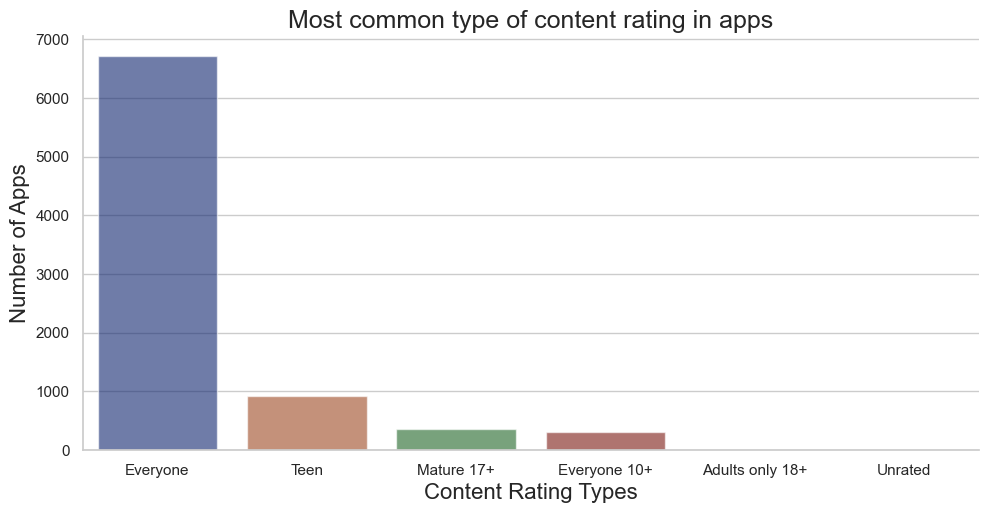

In [31]:
plt.figure(figsize=(20, 20))
sns.catplot(
    data=test4, kind="bar",
    x="index", y="Content Rating", palette="dark", alpha=.6, height=5, aspect=2
)
plt.xlabel("Content Rating Types", size=16)
plt.ylabel("Number of Apps", size=16)
plt.title("Most common type of content rating in apps", size=18)
plt.show()

Apps made for "Everyone" leads the app list, hence it may show potential area to develop. 

### Understanding the size

In [32]:
df_["Size"] = df_["Size"].str.extract('(\d+)')

In [33]:
df_["Size"]=pd.to_numeric(df_["Size"])

In [34]:
bins = pd.IntervalIndex.from_tuples([(0, 10), (10, 30), (30, 50), (50, 80), (80, 100),(100,200), (200, 300), (300,400), (400, np.max(df_["Size"]) + 1)], closed='left')
a = list('ABCDEFGHI')
df_['Size_Category'] = np.array(a)[pd.cut(df_["Size"], bins = bins).cat.codes]
print (df_[["Size", "Size_Category"]])

      Size Size_Category
0     19.0             B
1     14.0             B
2      8.0             A
3     25.0             B
4      2.0             A
...    ...           ...
8313   2.0             A
8314  53.0             D
8315   3.0             A
8316   NaN             I
8317  19.0             B

[8318 rows x 2 columns]


In [35]:
df_["Size_Category"].value_counts()

A    2827
B    2196
I    1320
C     987
D     618
E     265
F      41
G      34
H      30
Name: Size_Category, dtype: int64

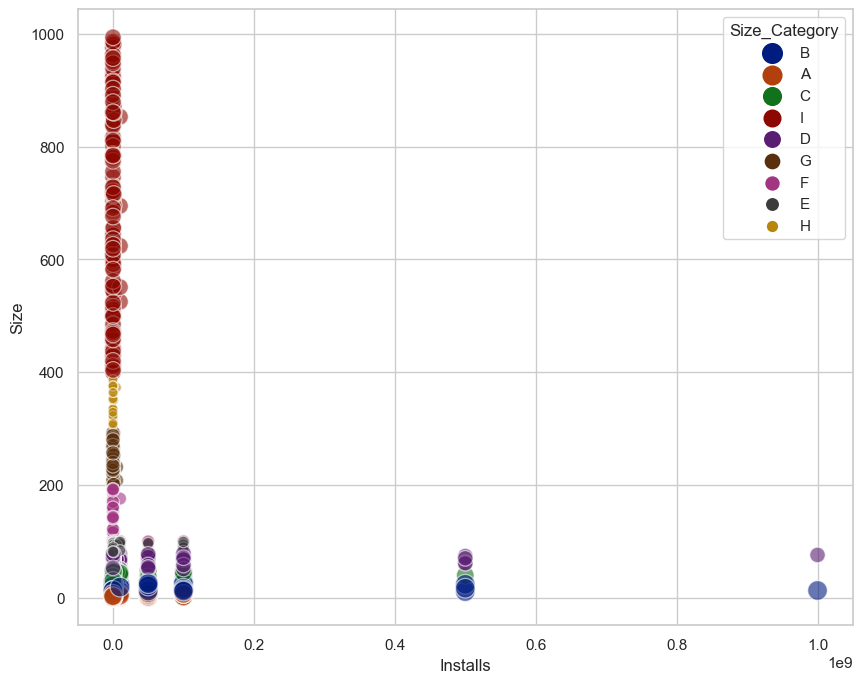

In [36]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df_, x="Installs", y="Size",size="Size_Category", hue="Size_Category",palette="dark",sizes=(50, 200),legend="full", alpha=0.6)
plt.ylabel("Size")
plt.xlabel("Installs")
# plt.xlim(0, 1000000000)
plt.show()

This shows that the most of the apps installed have size 400 or greater. The app with significantly high downloads have small sizes. 

### App Categories for potential market

In [37]:
df_.loc[df_["Installs"] > 100000000.0]["Category"].value_counts().tail(5)

PHOTOGRAPHY            2
TRAVEL_AND_LOCAL       2
BOOKS_AND_REFERENCE    1
ENTERTAINMENT          1
HEALTH_AND_FITNESS     1
Name: Category, dtype: int64

These categories are having a considerable amount of installs and have less competition. An optimized app in these categories may lead to a successful app.

## Conclusion
As an App Development Company, Jose should develop app having following features:
- Category : Communication, Family, Photography
- Type : Free 
- Content Rating : Everyone
- Size : 10 - 80 MB

These app that matches these requirements have potential to reach large audience

App in Social/Communication category are engaging highly directly with the customers. It can also be taken into account based on the purpose.

## An Analysis of Google Playstore Apps Data by Kartavya Desai